# PROJET 5 : Optimisez la gestion des données d'une boutique avec R ou Python

# Importation des librairies

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# I- Importation de la DataFrame erp

## 1- Utilisation de methodes, .info(), .shape, .isnull(), .unique() pour observer la dataframe

In [117]:
data_erp = pd.read_excel('erp.xlsx')

C:\Users\Infogene\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [118]:
data_erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [119]:
data_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [120]:
data_erp.shape

(825, 5)

In [121]:
data_erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [122]:
nb_na = data_erp.isnull().sum()
nb_na[nb_na>0]

# cette methode .isnull() permet de derterminer uniquement les variables avec les NaN

Series([], dtype: int64)

In [123]:
data_erp['price'].unique()

array([ 24.2 ,  34.3 ,  20.8 ,  14.1 ,  46.  ,  32.7 ,  31.2 ,  60.  ,
        42.6 ,  80.  ,  18.3 ,  22.8 ,  19.3 ,  21.8 ,   7.7 ,  33.7 ,
        44.3 ,  71.6 ,  86.1 ,  12.7 ,   8.7 ,  11.9 ,  14.5 ,  14.4 ,
        19.5 ,  22.  ,  16.6 ,  23.4 ,  33.2 ,  32.  ,  77.8 ,  14.7 ,
        14.05,  22.9 ,  44.  ,  37.  ,  39.  ,  17.  ,  23.2 ,  19.  ,
        16.4 ,  73.  ,  47.  ,  13.7 ,  12.6 ,  12.8 ,  22.1 ,  15.8 ,
        16.3 ,   9.7 ,   6.8 ,  35.  ,  31.7 , 100.  ,  23.  ,  88.4 ,
        29.8 ,  25.7 ,  77.4 ,  53.  ,  49.  ,  29.5 ,  33.  ,  37.5 ,
        69.  ,  59.  ,  19.2 ,  29.  ,   9.8 ,  20.35,  12.  ,  18.5 ,
         9.3 ,  11.6 ,  14.3 ,  10.8 ,   7.6 ,  20.5 ,  18.2 ,   9.  ,
         7.8 ,   5.7 ,  13.5 ,  11.5 ,  24.  ,  16.7 ,  21.4 ,  13.3 ,
         9.5 ,  12.1 ,  17.8 ,  27.2 ,   9.4 ,   5.8 ,  38.  ,   9.9 ,
        11.3 ,   6.7 ,  73.5 ,  79.8 ,  48.5 ,  39.8 ,  58.8 ,  26.5 ,
        13.4 ,  17.1 ,   8.9 ,  17.2 ,  16.9 ,  29.9 ,   9.6 ,  11.1 ,
      

## 2- Utilisation de la mathode duplicated(), drop_duplicates() pour determiner et suprimer les doublons, dropna() pour suprimier les valeurs NaN

In [124]:
data_erp.loc[data_erp[['product_id','onsale_web','price','stock_quantity','stock_status']].duplicated(keep=False)]

,product_id,onsale_web,price,stock_quantity,stock_status


In [125]:
data_erp.drop_duplicates(subset=['product_id','onsale_web','price','stock_quantity','stock_status'], inplace=True, ignore_index=True)

In [126]:
data_erp = data_erp.dropna()

In [127]:
data_erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


# II- Importation de la DataFrame web

In [128]:
data_web = pd.read_excel('web.xlsx')
data_web.head()

C:\Users\Infogene\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [129]:
data_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

## 1- Creation d'une nouvelle dataframe et utilisation de methodes, .info(), .shape, .isnull()  pour observer la dataframe

In [130]:
data_web_final = data_web[['sku','total_sales', 'post_name']]

In [131]:
data_web_final

,sku,total_sales,post_name
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
4,19814,3.0,pierre-jean-villa-igp-gamine-2018
...,...,...,...
1508,16135,5.0,mouthes-le-bihan-aime-chai-2015
1509,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018
1510,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018
1511,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


In [132]:
data_web_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          1428 non-null   object 
 1   total_sales  1430 non-null   float64
 2   post_name    1430 non-null   object 
dtypes: float64(1), object(2)
memory usage: 35.6+ KB


In [133]:
data_web_final.shape

(1513, 3)

In [134]:
data_web_final.isnull().sum()

sku            85
total_sales    83
post_name      83
dtype: int64

In [135]:
nb_na_web = data_web_final.isnull().sum()
nb_na_web[nb_na_web>0]

# cette methode .isnull() permet de derterminer uniquement les variables avec les NaN

sku            85
total_sales    83
post_name      83
dtype: int64

In [136]:
data_web_final.loc[data_web_final['sku'].isnull(),:]

# on observe que les valeurs NaN de la variables "sku" sont aussi nul dans les variables "total_sales" et post_name

,sku,total_sales,post_name
178,NaN,NaN,NaN
179,NaN,NaN,NaN
227,NaN,NaN,NaN
230,NaN,NaN,NaN
231,NaN,NaN,NaN
...,...,...,...
792,NaN,NaN,NaN
793,NaN,NaN,NaN
794,NaN,NaN,NaN
795,NaN,NaN,NaN


## 2- Utilisation de la mathode duplicated(), drop_duplicates() pour determiner et suprimer les doublons, dropna() pour suprimier les valeurs NaN

In [137]:
data_web_final.loc[data_web_final[['sku','total_sales','post_name']].duplicated(keep=False)]

,sku,total_sales,post_name
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
4,19814,3.0,pierre-jean-villa-igp-gamine-2018
...,...,...,...
1508,16135,5.0,mouthes-le-bihan-aime-chai-2015
1509,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018
1510,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018
1511,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


In [138]:
data_web_final.drop_duplicates(subset=['sku','total_sales','post_name'], inplace=True, ignore_index=True)

C:\Users\Infogene\AppData\Local\Temp\ipykernel_25536\1385408639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_web_final.drop_duplicates(subset=['sku','total_sales','post_name'], inplace=True, ignore_index=True)


In [139]:
data_web_final = data_web_final.dropna()

In [140]:
data_web_final

,sku,total_sales,post_name
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
4,19814,3.0,pierre-jean-villa-igp-gamine-2018
...,...,...,...
712,16135,5.0,mouthes-le-bihan-aime-chai-2015
713,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018
714,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018
715,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


# III- Importation de la DataFrame liaison

## 1- Utilisation de methodes, .info(), .shape, .isnull(), .rename() pour renommer les variables et  pour observer la dataframe

In [141]:
data_liaison = pd.read_excel('liaison.xlsx')

C:\Users\Infogene\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [142]:
data_liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [143]:
data_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [144]:
data_liaison.shape

(825, 2)

In [145]:
data_liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

In [146]:
nb_na_liaison = data_liaison.isnull().sum()
nb_na_liaison[nb_na_liaison>0]

# cette methode .isnull() permet de derterminer uniquement les variables avec les NaN

id_web    91
dtype: int64

## 2- Utilisation de la mathode duplicated(), drop_duplicates() pour determiner et suprimer les doublons, dropna() pour suprimier les valeurs NaN

In [147]:
data_liaison.loc[data_liaison[['product_id','id_web']].duplicated(keep=False)]

,product_id,id_web


In [148]:
data_liaison.drop_duplicates(subset=['product_id','id_web'], inplace=True, ignore_index=True)

In [149]:
data_liaison = data_liaison.dropna()

In [150]:
data_liaison = data_liaison.rename(columns={'id_web':'sku'})

In [151]:
data_liaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


# IV- rapprochement des dataframes

## 1- Jointure externe et interne des dataframes

In [152]:
data_erp_liaison = pd.merge(data_erp, data_liaison, on='product_id', how='outer')

In [153]:
data_erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [154]:
data_erp_liaison_web = pd.merge(data_erp_liaison, data_web_final, on='sku', how='inner')

In [155]:
data_erp_liaison_web

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name
0,3847,1,24.2,0,outofstock,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
1,3849,1,34.3,0,outofstock,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
2,3850,1,20.8,0,outofstock,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
3,4032,1,14.1,0,outofstock,19814,3.0,pierre-jean-villa-igp-gamine-2018
4,4039,1,46.0,0,outofstock,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017
...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,5.0,mouthes-le-bihan-aime-chai-2015
710,7023,1,27.5,15,instock,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018
711,7025,1,69.0,2,instock,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018
712,7247,1,54.8,23,instock,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


## 2- Utilisation de la boucle For pour changer le type des variables en category et string

In [156]:
var_modif = ['product_id', 'sku']
for var in var_modif:
    data_erp_liaison_web[var]=data_erp_liaison_web[var].astype('category')

In [157]:
var_modif = ['stock_status', 'post_name']
for var in var_modif:
    data_erp_liaison_web[var]=data_erp_liaison_web[var].astype('string')

In [158]:
data_erp_liaison_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      714 non-null    category
 1   onsale_web      714 non-null    int64   
 2   price           714 non-null    float64 
 3   stock_quantity  714 non-null    int64   
 4   stock_status    714 non-null    string  
 5   sku             714 non-null    category
 6   total_sales     714 non-null    float64 
 7   post_name       714 non-null    string  
dtypes: category(2), float64(2), int64(2), string(2)
memory usage: 85.3 KB


## 3- Le chiffre d'affaires par produits et le chiffre d'affaires total réalisé en ligne

In [159]:
sum(data_erp_liaison_web['price']*data_erp_liaison_web['total_sales']*data_erp_liaison_web['onsale_web'])

# le chiffre d'affaires total par produits est de 70568.6$

70568.6

In [160]:
round(sum(data_erp_liaison_web['price']*data_erp_liaison_web['onsale_web']))

# le chiffre d'affaires total en ligne est de 23200$

23200

In [161]:
data_erp_liaison_web['chiffre_affaire_par_produit'] = data_erp_liaison_web['price']*data_erp_liaison_web['total_sales']

In [162]:
data_erp_liaison_web

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name,chiffre_affaire_par_produit
0,3847,1,24.2,0,outofstock,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,0.0
3,4032,1,14.1,0,outofstock,19814,3.0,pierre-jean-villa-igp-gamine-2018,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017,0.0
...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,5.0,mouthes-le-bihan-aime-chai-2015,42.0
710,7023,1,27.5,15,instock,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018,0.0
711,7025,1,69.0,2,instock,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018,0.0
712,7247,1,54.8,23,instock,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,0.0


## 4- Utilisation de la methode describe() et les mesures de dispersion

In [163]:
data_erp_liaison_web['price'].describe()

# std 27.81 est l'ecart_type empirique

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

In [164]:
data_erp_liaison_web['price'].median()

23.55

In [165]:
data_erp_liaison_web['price'].var()

773.425296455189

In [166]:
data_erp_liaison_web['price'].var(ddof=0)

# la variance empirique corrigée

772.3420677486691

In [167]:
data_erp_liaison_web['price'].std()/data_erp_liaison_web['price'].mean()

# le coefficient de variation

0.8558891898974201

# V- Detection des valeurs abérantes de la variable "price"

In [168]:
# importation du module stats de scipy
from scipy import stats
# Fonction pour determiner les outliers
# Valeur < Q1 - 1.5IQR ou Valeur > Q3 + 1.5IQR alors on a les outliers
def finding_outliers(data, variable_name):
    '''
    data = data frame pandas
    variable_name= nom de la variable (chaine de caractere)
    '''
    # Calcul de l'IQR Q1 et Q3
    iqr = stats.iqr(data[variable_name])
    q1 = data[variable_name].quantile(0.25)
    q3 = data[variable_name].quantile(0.75)
    # Calcul de limite de Q1 - 1.5IQR et Q3 + 1.5IQR
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # Dataframe des valeurs aberantes 
    outliers_df = data[(data[variable_name]<lower) | (data[variable_name]>upper)]
    return outliers_df
    

In [169]:
# point de données aberants de la variable indiquant le prix

finding_outliers(data = data_erp_liaison_web, variable_name = 'price').sort_values(by=['price'])

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name,chiffre_affaire_par_produit
205,4359,1,85.6,0,outofstock,13853,1.0,champagne-larmandier-bernier-grand-cru-vieille...,85.6
438,5026,1,86.8,2,instock,13913,0.0,champagne-agrapart-fils-mineral-extra-brut-bla...,0.0
65,4132,1,88.4,5,instock,11668,0.0,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,0.0
502,5565,1,92.0,0,outofstock,19822,0.0,tempier-bandol-cabassaou-2017,0.0
602,5916,1,93.0,3,instock,14774,0.0,wemyss-malts-single-cask-chocolate-moka-cake,0.0
655,6214,1,99.0,7,instock,11601,0.0,domaine-des-comtes-lafon-volnay-1er-cru-champa...,0.0
63,4115,1,100.0,11,instock,15382,0.0,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,0.0
380,4903,1,102.3,20,instock,14805,0.0,domaine-des-croix-corton-grand-cru-les-greves-...,0.0
222,4407,1,104.0,6,instock,3509,1.0,cognac-frapin-cigar-blend,104.0
432,5008,1,105.0,10,instock,11602,0.0,domaine-des-comtes-lafon-volnay-1er-cru-santen...,0.0


## 1- Construction de la boite à moustaches avec python pour visualiser les valeurs aberantes

In [170]:
data_outliers_price = finding_outliers(data = data_erp_liaison_web, variable_name = 'price')

In [171]:
data_outliers_price.shape

(32, 9)

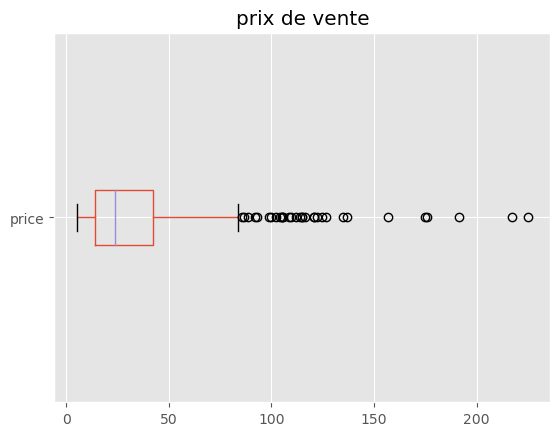

In [172]:
data_erp_liaison_web.boxplot(column='price', vert=False).set_title('prix de vente')
plt.show()

# Conclusion

#### statisquement parlant, les prix determinés des bouteilles de vin sont des outliers. En effet, la distribution des prix abérants vendu sortent du lot. Mais en realité, elles ne sont pas des outliers car elles correspondes à des bouteilles de vin tres cher par rapport à la moyenne des prix de vin vendu.